In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip -q install healpy
!pip install git+https://github.com/vafaei-ar/ccgpack.git

     |████████████████████████████████| 23.6 MB 1.3 MB/s 
  Cloning https://github.com/vafaei-ar/ccgpack.git to /tmp/pip-req-build-sqrf290m
  Running command git clone -q https://github.com/vafaei-ar/ccgpack.git /tmp/pip-req-build-sqrf290m
  Created wheel for ccgpack: filename=ccgpack-0.1.0-cp37-cp37m-linux_x86_64.whl size=912836 sha256=e5f1dadcb9e4a61e6ae70397d05c688b7ee09d8b0c06b6513e2229097406e98b
  Stored in directory: /tmp/pip-ephem-wheel-cache-hhqvg42c/wheels/12/6f/95/7ae57565d174cea0e92a0da0a36f289e045f46ef2173da656b
Successfully built ccgpack


In [ ]:
import numpy as np
import healpy as hp
import pylab as plt
import ccgpack as ccg

In [ ]:
map = '/content/drive/MyDrive/CMB/map1n_allz_rtaapixlw_2048_1.fits'
string_map = hp.read_map(map,nest=1,verbose=0)

In [ ]:
gauss = "/content/drive/MyDrive/CMB/product-action?SIMULATED_MAP.FILE_ID=febecop_ffp10_lensed_scl_cmb_100_mc_0000.fits"
gaussian_map = hp.read_map(gauss,nest=1,verbose=0)

In [ ]:
g_mu = 1e-6
cmb_with_string = gaussian_map + (g_mu * string_map)




# Power Spectrum------------------------------------------------------------------------

In [ ]:
g_map = hp.sphtfunc.anafast(gaussian_map)

In [ ]:
s_map = hp.sphtfunc.anafast(string_map)

In [ ]:
CMB_map = hp.sphtfunc.anafast(cmb_with_string)

In [ ]:
l =  [i for i in range(1024)]
"""
y1 = l * (l + 1) * g_map
y2 = l * (l + 1) * s_map
y3 = l * (l + 1) * CMB_map"""

'\ny1 = l * (l + 1) * g_map\ny2 = l * (l + 1) * s_map\ny3 = l * (l + 1) * CMB_map'

In [ ]:
plt.figure(figsize = (25, 8))
plt.subplot(1, 3, 1)
plt.plot(l, y1, label = "Gaussian")
plt.xlabel("l")
plt.subplot(1, 3, 2)
plt.plot(l, y2, label = "String")
plt.xlabel("l")
plt.subplot(1, 3, 3)
plt.plot(l, y3, label = "CMB with String")
plt.xlabel("l")
plt.legend()
plt.show()

In [ ]:
ss_map = s_map * g_mu *0.5*1e-4
f = l * (l + 1) * ss_map

In [ ]:
def y1(x, map):
  global Y1
  y = x*(x+1) * map[x]
  Y1.append(y)

def y2(x, map):
  global Y2
  y = x*(x+1) * map[x] * g_mu *(0.5 * 1e-4) 
  Y2.append(y)

def y3(x, map):
  global Y3
  y = x*(x+1) * map[x]
  Y3.append(y) 
  

In [59]:
Y1 = []
Y2 = []
Y3 = []
for i in l:
  y1(i, g_map)
  y2(i, s_map)
  y3(i, CMB_map)

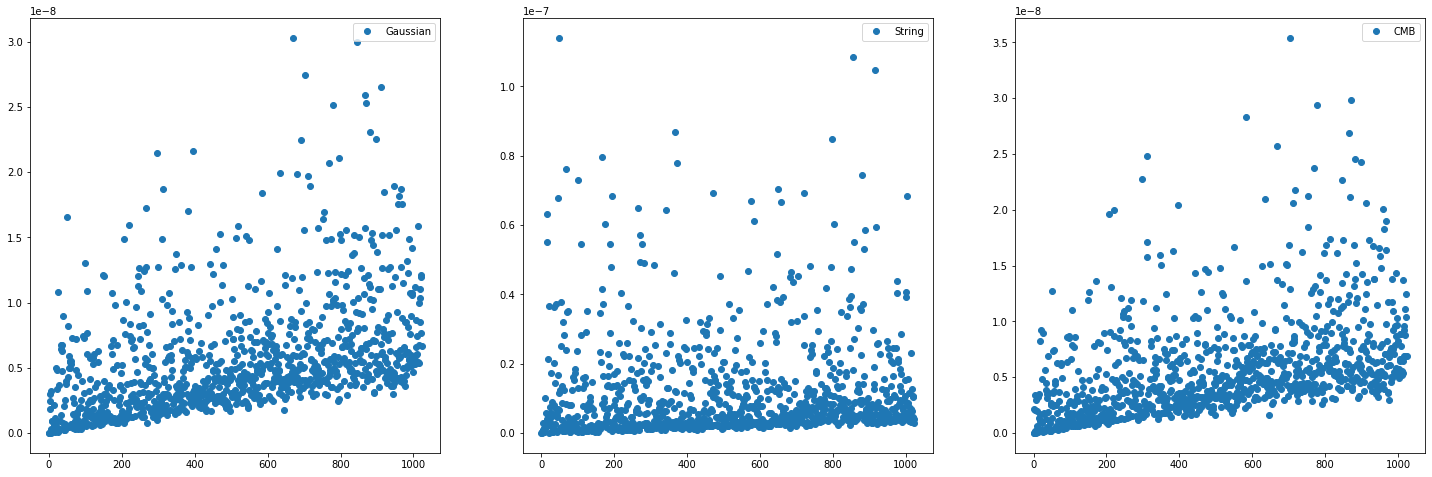

In [ ]:
plt.figure(figsize = (25, 8))

plt.subplot(1, 3, 1)
plt.plot(l, Y1, "o", label = "Gaussian")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(l, Y2, "o", label = "String")
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(l, Y3, "o", label = "CMB")
plt.legend()

plt.show()

In [ ]:
!wget https://irsa.ipac.caltech.edu/data/Planck/release_3/ancillary-data/cosmoparams/COM_PowerSpect_CMB-TT-binned_R3.01.txt

In [100]:
cmb_binned_spectrum = np.loadtxt('COM_PowerSpect_CMB-TT-binned_R3.01.txt')

In [86]:
lmax = 40

In [95]:
g_new = hp.anafast(gaussian_map, lmax=lmax, use_pixel_weights=True)

In [96]:
s_new = new = hp.anafast(string_map, lmax=lmax, use_pixel_weights=True)

In [97]:
CMB_new = new = hp.anafast(cmb_with_string, lmax=lmax, use_pixel_weights=True)

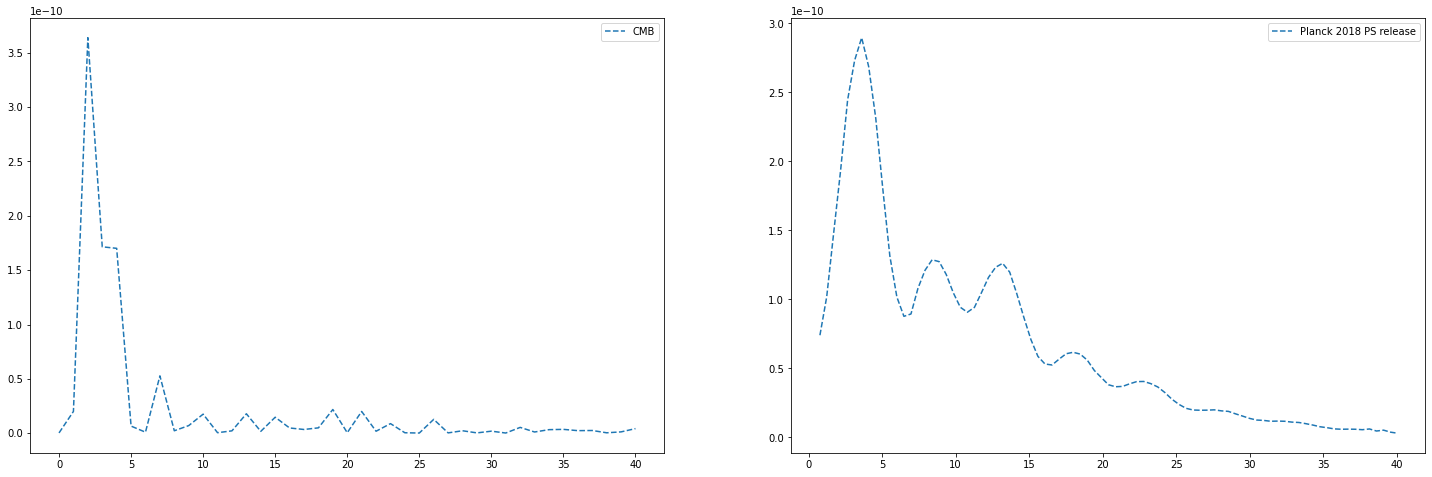

In [117]:
plt.figure(figsize = (25, 8))
"""
plt.subplot(1, 4, 1)
plt.plot(g_new, "--", label = "Gaussian")
plt.legend()

plt.subplot(1, 4, 2)
plt.plot(s_new, "--", label = "String")
plt.legend()
"""
plt.subplot(1, 2, 1)
plt.plot(CMB_new,"--", label = "CMB")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cmb_binned_spectrum[:,0]/62.5, cmb_binned_spectrum[:,1]*0.5*1e-13, '--', label='Planck 2018 PS release')
plt.legend()

plt.show()

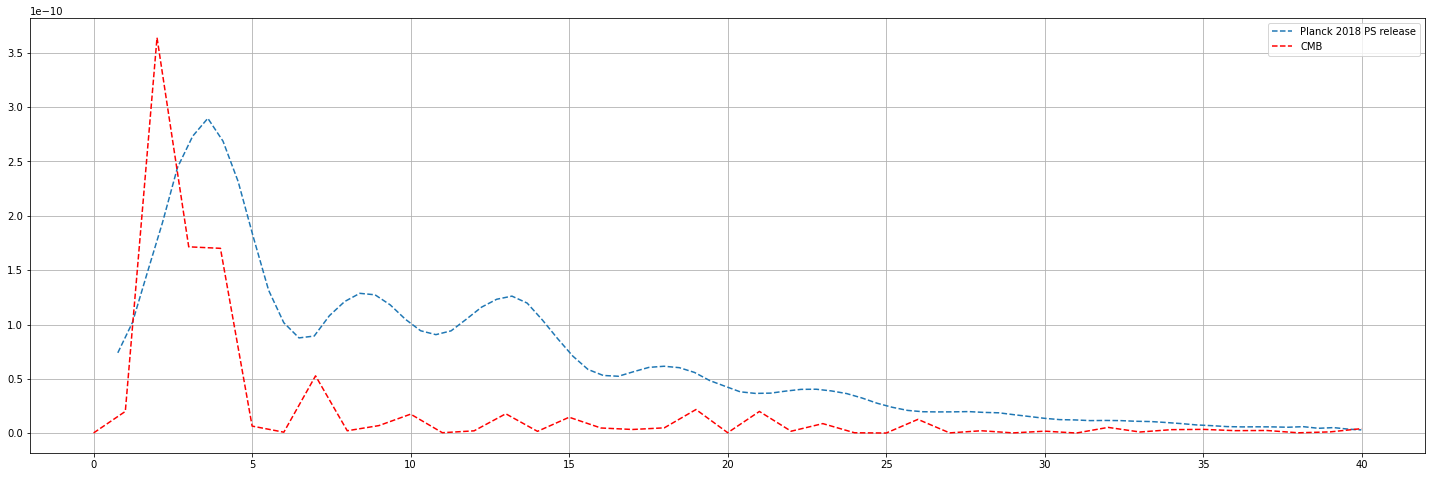

In [121]:
plt.figure(figsize = (25, 8))
plt.plot(cmb_binned_spectrum[:,0]/62.5, cmb_binned_spectrum[:,1]*0.5*1e-13, '--', label='Planck 2018 PS release')
plt.plot(CMB_new,"--", label = "CMB")
plt.legend()
plt.grid()
plt.show()

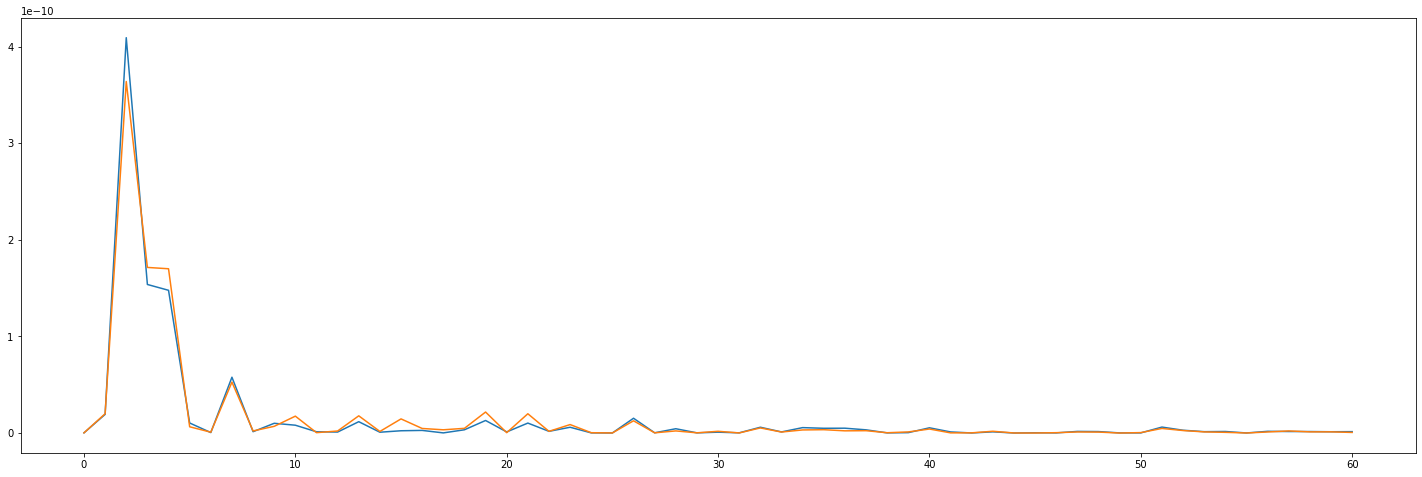

In [76]:
plt.figure(figsize = (25, 8))
plt.plot(g_new)
#plt.plot(s_new)
plt.plot(CMB_new)
plt.show()